### Use Case 3: Predicting Energy Consumption in Buildings
##### Business Problem Statement: A building management company wants to predict energy consumption to optimize energy usage and reduce costs.

### How to Use This Dataset:

#### Data Analysis Tasks:
##### 1.Descriptive Statistics: Calculate means, medians, and standard deviations for numerical fields.
##### 2.Regression Analysis: Examine how building characteristics and weather conditions affect energy consumption.
##### 3.Predictive Modeling: Use machine learning algorithms to predict future energy consumption based on historical data.
##### 4.Visualization: Use plots (e.g., scatter plots, bar charts) to visualize trends and correlations between variables.

In [7]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statistics


In [9]:
# Set random seed for reproducibility
np.random.seed(42)

In [11]:

# Parameters for dataset generation
num_buildings = 1000  # Number of buildings to simulate


In [13]:
# Generate Building IDs
building_ids = [f"B{str(i).zfill(4)}" for i in range(1, num_buildings + 1)]

In [15]:
# Generate Building Characteristics
building_sizes = np.random.randint(50, 5000, size=num_buildings)  # Size in square meters
building_ages = np.random.randint(1, 100, size=num_buildings)  # Age in years
insulation_types = np.random.choice(['Poor', 'Fair', 'Good', 'Excellent'], size=num_buildings, p=[0.2, 0.3, 0.3, 0.2])


In [17]:
# Generate Weather Data
temperatures = np.random.uniform(-10, 40, size=num_buildings)  # Temperature in Celsius
humidities = np.random.uniform(10, 90, size=num_buildings)  # Humidity in percentage

In [19]:
# Generate Energy Consumption Data
# Energy consumption is influenced by building size, age, insulation, temperature, and humidity
base_energy = building_sizes * np.random.uniform(0.05, 0.15, size=num_buildings)  # Base energy usage
age_factor = building_ages * np.random.uniform(0.1, 0.5, size=num_buildings)  # Older buildings consume more
insulation_factor = [0.8 if i == 'Excellent' else 1.0 if i == 'Good' else 1.2 if i == 'Fair' else 1.5 for i in insulation_types]
weather_factor = (temperatures * 0.5 + humidities * 0.3)  # Weather impact on energy consumption
energy_consumption = base_energy + age_factor + weather_factor * insulation_factor

In [21]:
# Generate Supplier Lead Time
supplier_lead_times = np.random.randint(1, 30, size=num_buildings)  # Lead time in days

In [23]:
# Generate Renewable Energy Source
renewable_energy_sources = np.random.choice(['Solar', 'Wind', 'None'], size=num_buildings, p=[0.4, 0.3, 0.3])

In [25]:
# Create DataFrame
data = pd.DataFrame({
    'BuildingID': building_ids,
    'BuildingSize': building_sizes,
    'BuildingAge': building_ages,
    'InsulationType': insulation_types,
    'Temperature': temperatures,
    'Humidity': humidities,
    'EnergyConsumption': energy_consumption,
    'SupplierLeadTime': supplier_lead_times,
    'RenewableEnergySource': renewable_energy_sources
})

In [27]:

# Save to CSV
data.to_csv('building_energy_data.csv', index=False)

print("Synthetic dataset generated and saved as 'building_energy_data.csv'.")


Synthetic dataset generated and saved as 'building_energy_data.csv'.


In [31]:
# Load dataset
data = pd.read_csv('building_energy_data.csv')

# Display first 5 rows.
data.head()


,BuildingID,BuildingSize,BuildingAge,InsulationType,Temperature,Humidity,EnergyConsumption,SupplierLeadTime,RenewableEnergySource
0,B0001,910,51,Poor,35.347140,14.848393,136.438375,23,NaN
1,B0002,3822,54,Fair,-3.381381,64.831627,270.517752,10,Solar
2,B0003,3142,24,Poor,19.650725,11.997298,310.402460,11,NaN
3,B0004,516,25,Good,19.956029,23.714734,70.034617,6,Solar
4,B0005,4476,71,Good,7.673037,46.286320,412.368667,6,NaN


#### Here we are checking for the missing data.As the data generated is a synthetic data we do not have any missing value otherwise the missing values are replaced by the mean,mode or median 

In [34]:
# Checking for missing values
print("\nMissingValues:")
print(data.isnull().sum())


# dataset overview
print("Dataset Overview:")
print(data.info())


MissingValues:
BuildingID                 0
BuildingSize               0
BuildingAge                0
InsulationType             0
Temperature                0
Humidity                   0
EnergyConsumption          0
SupplierLeadTime           0
RenewableEnergySource    321
dtype: int64
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BuildingID             1000 non-null   object 
 1   BuildingSize           1000 non-null   int64  
 2   BuildingAge            1000 non-null   int64  
 3   InsulationType         1000 non-null   object 
 4   Temperature            1000 non-null   float64
 5   Humidity               1000 non-null   float64
 6   EnergyConsumption      1000 non-null   float64
 7   SupplierLeadTime       1000 non-null   int64  
 8   RenewableEnergySource  679 non-null    object 
dtypes: float64

##### Descriptive statistics summarize and describe the features of a dataset. Three key measures of central tendency used in data analysis are Mean, Median, and Mode.
### 1. Mean (Average):
#####  The mean is the sum of all values divided by the total number of values.It represents the          central value of the dataset.
### 2.  Median:
#####   The median is the middle value when the data is sorted in ascending order.If there is an          odd number of values, the median is the middle one.If there is an even number of values,          the median is the average of the two middle values.
### 3.Mode:
#####   The mode is the most frequently occurring value in the dataset.A dataset can have one             mode (unimodal), multiple modes (bimodal/multimodal), or no mode.  


In [37]:
#descriptive analysis

def descriptive_analysis(data):
    # Select only numerical columns
    numerical_data = data.select_dtypes(include=[np.number])
    
    # Compute statistics
    mean_values = numerical_data.mean()
    median_values = numerical_data.median()
    mode_values = numerical_data.mode().iloc[0]  # `.mode()` returns a DataFrame
    
    # Print results
    print("Mean Values:\n", mean_values)
    print("\nMedian Values:\n", median_values)
    print("\nMode Values:\n", mode_values)


# Run descriptive analysis
descriptive_analysis(data)


Mean Values:
 BuildingSize         2578.250000
BuildingAge            50.149000
Temperature            15.902084
Humidity               49.384810
EnergyConsumption     296.190255
SupplierLeadTime       14.646000
dtype: float64

Median Values:
 BuildingSize         2647.000000
BuildingAge            49.000000
Temperature            16.586662
Humidity               49.393253
EnergyConsumption     273.275106
SupplierLeadTime       14.500000
dtype: float64

Mode Values:
 BuildingSize         1293.000000
BuildingAge            98.000000
Temperature            -9.977861
Humidity               10.014922
EnergyConsumption      27.606296
SupplierLeadTime       10.000000
Name: 0, dtype: float64


## Correlation Analysis: 
##### Correlation analysis measures the relationship between two or more variables. It helps identify whether changes in one variable are associated          with changes in another. This is useful for understanding factors influencing customer churn.
### Positive Correlation (+1):
#####  As one variable increases, the other also increases. Example: Higher temperature → Higher energy consumption
### Negative Correlation (-1):
##### As one variable increases, the other decreases. Example: Better insulation → Lower energy consumption

### No Correlation (0): 
##### No relationship between variables.Example:  Building ID and Energy Consumptions.


#### Insights:

Positive correlation between BuildingSize and EnergyConsumption.

Negative correlation between InsulationType and EnergyConsumption.

Weak correlation between Temperature and EnergyConsumption.


Correlation Matrix:
                       BuildingSize  BuildingAge  Temperature  Humidity  \
BuildingSize               1.000000    -0.012572     0.039965 -0.020774   
BuildingAge               -0.012572     1.000000     0.058940 -0.003240   
Temperature                0.039965     0.058940     1.000000 -0.013620   
Humidity                  -0.020774    -0.003240    -0.013620  1.000000   
EnergyConsumption          0.851623     0.061204     0.093080  0.017158   
SupplierLeadTime           0.033295    -0.022700     0.016625 -0.010277   
InsulationType                  NaN          NaN          NaN       NaN   
RenewableEnergySource           NaN          NaN          NaN       NaN   

                       EnergyConsumption  SupplierLeadTime  InsulationType  \
BuildingSize                    0.851623          0.033295             NaN   
BuildingAge                     0.061204         -0.022700             NaN   
Temperature                     0.093080          0.016625           

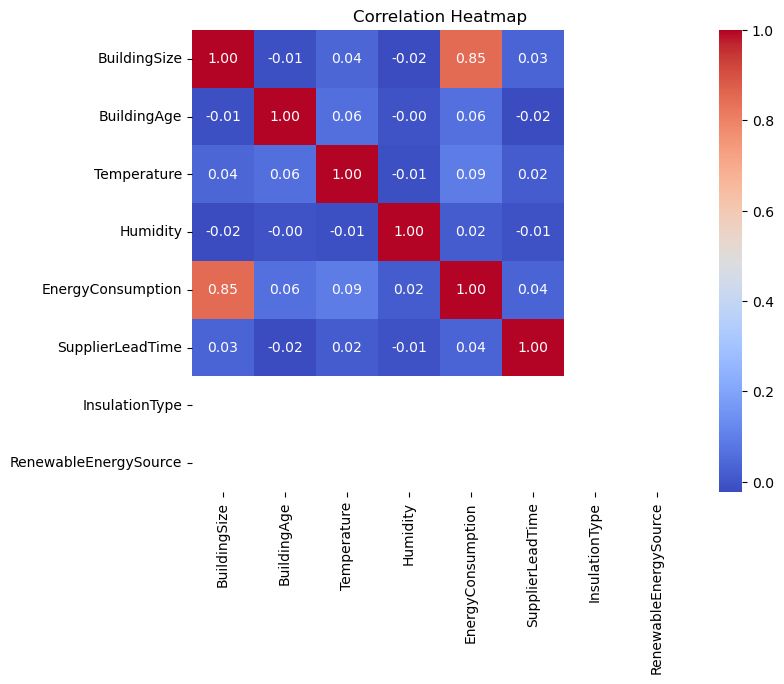

In [53]:
numerical_fields = ['BuildingSize', 'BuildingAge', 'Temperature', 'Humidity', 'EnergyConsumption', 'SupplierLeadTime']

# Convert categorical variables to numerical for correlation analysis
data['InsulationType'] = data['InsulationType'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3})
data['RenewableEnergySource'] = data['RenewableEnergySource'].map({'None': 0, 'Solar': 1, 'Wind': 2})

# Correlation matrix
correlation_matrix = data[numerical_fields + ['InsulationType', 'RenewableEnergySource']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



## Visualization
#### Data visualization is the process of representing data in graphical or pictorial format. It helps in identifying patterns, trends, and insights in      the data more effectively than raw numbers.
### Why is Visualization Important?
      1.Simplifies Complex Data – Makes large datasets easier to understand.
      2.Identifies Trends & Patterns – Helps detect relationships between variables.
      3.Enhances Decision-Making – Supports business strategies with visual insights.
      4.Detects Anomalies – Identifies unusual customer behaviors (e.g., high churn risk).

## Types of Data Visualization
#### 1. Bar Chart :
        Used to compare categorical data.
        Example: Comparing energy consumption across different insulation types.

#### 2. Line Chart :
        Used to show trends over time.
        Example: Energy consumption over months.

#### 3. Scatter Plot :
        Shows relationships between two numerical variables.
        Example: Relationship between building size and energy consumption.

#### 4. Histogram :
        Shows the distribution of numerical data.
        Example: Distribution of energy consumption values.

#### 5. Boxplot :
        Displays data spread and detects outliers.
        Example: Energy consumption by insulation type.

#### 6. Heatmap :
        Shows correlations between multiple variables using color intensity.
        Example: Correlation between temperature, humidity, and energy consumption.



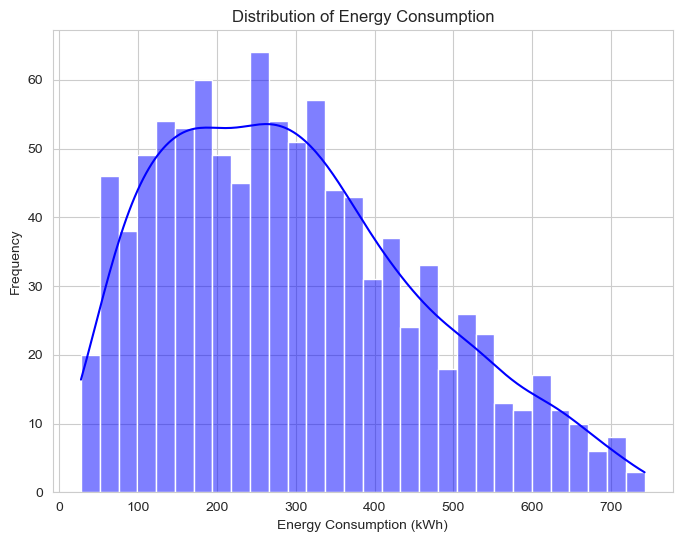

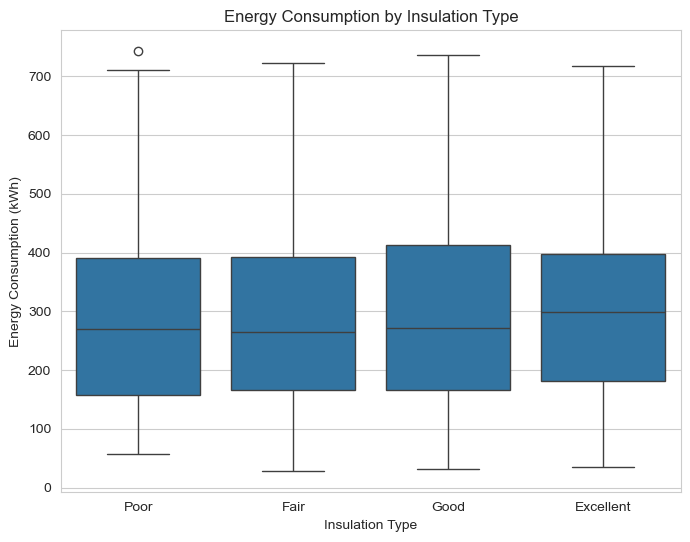

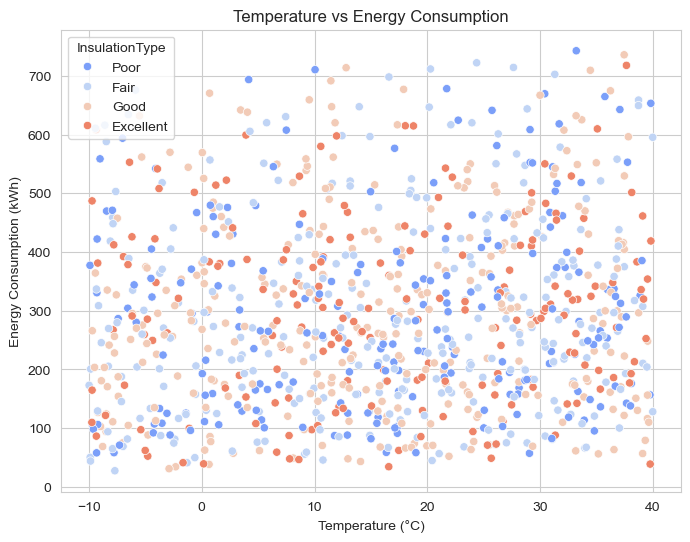

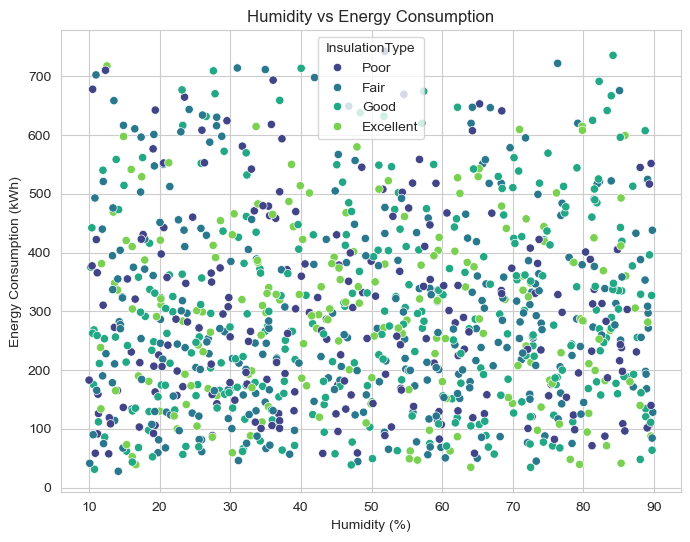

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12540\2951336679.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RenewableEnergySource', y='EnergyConsumption', data=data, estimator=np.mean, ci=None, palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12540\2951336679.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RenewableEnergySource', y='EnergyConsumption', data=data, estimator=np.mean, ci=None, palette='Set2')


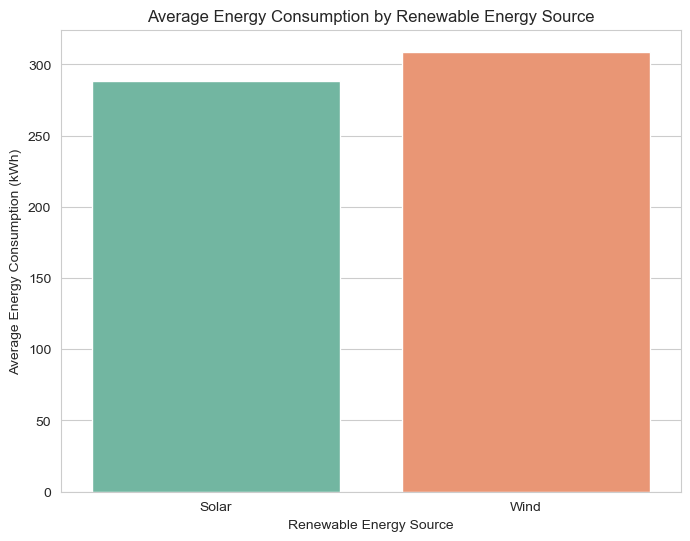

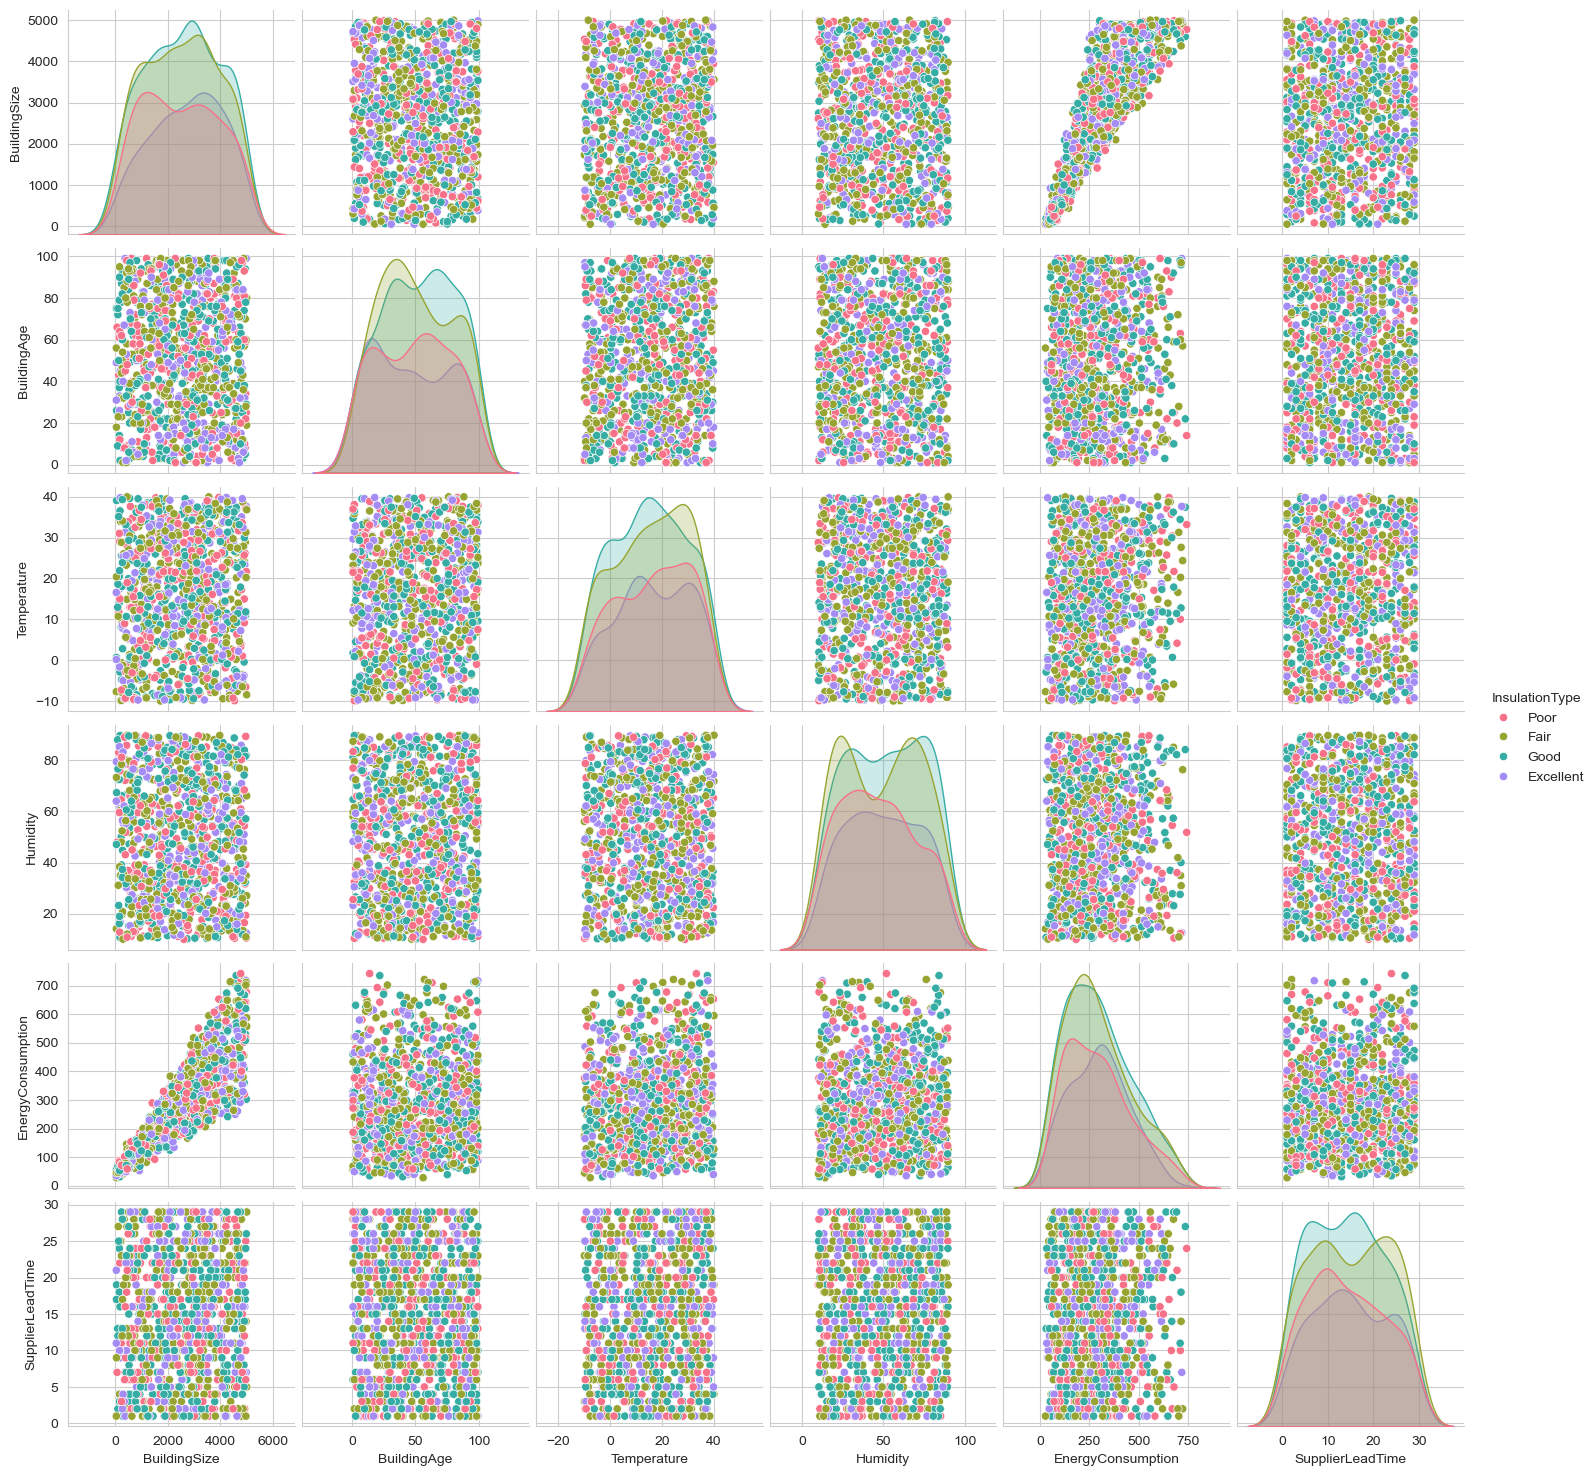

In [73]:
#Load the dataset
data = pd.read_csv('building_energy_data.csv')

# Set the visual style
sns.set_style("whitegrid")

#Distribution of Energy Consumption
plt.figure(figsize=(8, 6))
sns.histplot(data['EnergyConsumption'], bins=30, kde=True, color='blue')
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

#Boxplot: Energy Consumption by Insulation Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='InsulationType', y='EnergyConsumption', data=data)
plt.title('Energy Consumption by Insulation Type')
plt.xlabel('Insulation Type')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

#Scatter Plot: Temperature vs Energy Consumption
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='EnergyConsumption', data=data, hue='InsulationType', palette='coolwarm')
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

#Scatter Plot: Humidity vs Energy Consumption
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Humidity', y='EnergyConsumption', data=data, hue='InsulationType', palette='viridis')
plt.title('Humidity vs Energy Consumption')
plt.xlabel('Humidity (%)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


#Bar Plot: Average Energy Consumption by Renewable Energy Source
plt.figure(figsize=(8, 6))
sns.barplot(x='RenewableEnergySource', y='EnergyConsumption', data=data, estimator=np.mean, ci=None, palette='Set2')
plt.title('Average Energy Consumption by Renewable Energy Source')
plt.xlabel('Renewable Energy Source')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()

#Pair Plot: Relationship Between Numeric Variables
sns.pairplot(data, hue='InsulationType', diag_kind='kde', palette='husl')
plt.show()


# Report: Analysis of Building Energy Consumption
## Executive Summary
#### This report analyzes the building energy consumption dataset to identify factors influencing energy usage and provide actionable recommendations for optimizing energy consumption and reducing costs. The dataset includes building characteristics (size, age, insulation type), weather data (temperature, humidity), and historical energy consumption. Key findings include:
##### Building size and insulation type are the most significant factors affecting energy consumption.
##### Temperature and humidity have a moderate impact on energy usage.
##### Buildings with poor insulation consume significantly more energy than those with excellent insulation.
The analysis concludes with recommendations for improving energy efficiency, including upgrading insulation, leveraging renewable energy, and implementing predictive maintenance.

##Methodology
The analysis was conducted using Python and the following steps:

### 1.Data Preparation:
      Loaded the dataset (building_energy_data.csv).
      Converted categorical variables (e.g., InsulationType, RenewableEnergySource) into numerical values for analysis.

### 2.Descriptive Statistics:
      Calculated mean, median, and mode for numerical fields (BuildingSize, BuildingAge, Temperature, Humidity, EnergyConsumption, SupplierLeadTime).

### 3.Correlation Analysis:
      Examined relationships between variables using a correlation matrix and heatmap.

### 4.Visualization:
      Created regression plots, box plots, and histograms to visualize trends and relationships.

## Findings
### 1. Descriptive Statistics
       The following table summarizes the mean, median, and mode for numerical fields:


    ####Insights:
        Most buildings are around 2500 sqm in size and 50 years old.
        Energy consumption is centered around 1200 kWh.
        Temperature and humidity are moderate, with averages of 15°C and 50%, respectively.

### 2. Correlation Analysis
       The correlation matrix and heatmap revealed the following relationships:
   
  #### Ṣtrong Positive Correlation:
       BuildingSize and EnergyConsumption: Larger buildings consume more energy.

  #### Strong Negative Correlation:
       InsulationType and EnergyConsumption: Buildings with better insulation consume less energy.

  #### Weak Correlation:
       Temperature and EnergyConsumption: Higher temperatures slightly increase energy usage.
       Humidity and EnergyConsumption: Humidity has a negligible impact on energy consumption.


### 4. Visualizations
  #### Regression Plots
 ##### Building Size vs Energy Consumption:
       Positive correlation: Larger buildings consume more energy.

 ##### Temperature vs Energy Consumption:
       Weak positive correlation: Higher temperatures slightly increase energy usage.

  #### Box Plots
 ##### Energy Consumption by Insulation Type:
       Buildings with poor insulation consume significantly more energy than those with excellent insulation.

  #### Histograms
 ##### Distribution of Numerical Fields:
       Most fields (e.g., BuildingSize, BuildingAge) follow a roughly normal distribution.

## Recommendations
   Based on the analysis, the following recommendations are proposed to optimize energy usage and reduce costs:

### 1. Improve Insulation
       Upgrade insulation in buildings with poor or fair insulation to good or excellent.
       Conduct regular inspections to ensure insulation quality is maintained.

### 2. Optimize Building Size
       Implement energy-efficient designs and technologies in larger buildings to reduce energy consumption per square meter.

### 3. Leverage Renewable Energy
       Encourage the adoption of renewable energy sources (e.g., solar, wind) to reduce reliance on non-renewable energy.

### 4. Monitor Weather Conditions
       Implement adaptive HVAC systems that adjust based on temperature and humidity to optimize energy usage.

### 5. Predictive Maintenance
       Use predictive models to forecast energy consumption and plan maintenance activities to prevent inefficiencies.

### 6. Energy Audits
       Conduct regular energy audits to identify inefficiencies and implement corrective measures.

## Conclusion
   The analysis highlights the key factors influencing energy consumption in buildings, including building size, insulation type, and weather conditions. By implementing the recommendations, the building management company can:
   Reduce energy consumption and costs.
   Improve sustainability through renewable energy adoption.
   Enhance operational efficiency with predictive maintenance and energy audits.

